## Step 1 Import all the libraries
The KNeighborsClassifier class is used in machine learning for classification tasks based on the principle of nearest neighbors.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

## Step 2: Load the Dataset and peform basic EDA

In [3]:
customer_df = pd.read_csv("Customer Purchase.csv")
customer_df.head()  #print the first 5 records form the dataset

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [4]:
customer_df.describe().T          #return the mean, standard derivation, quantile, percentile, deciles of the numerical columns

,count,mean,std,min,25%,50%,75%,max
Customer ID,50.0,1045.50,14.577380,1021.0,1033.25,1045.5,1057.75,1070.0
Age,50.0,54.16,25.658161,15.0,30.25,57.0,74.00,98.0


In [5]:
customer_df.info()         # return all the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [6]:
customer_df.shape # shape attribute tell the dimension of the dataset

(50, 6)

In [7]:
customer_df.isna().sum()  # check the null values

Customer ID    0
Age            0
Gender         0
Education      0
Review         0
Purchased      0
dtype: int64

## Step 3: Drop and convert the columns

Drop the column (Customer_ID) that is not useful in the prediction. 
Convert the values of categorical columns into numerical values because most machine learning models cannot understand text or categorical values directly. They only work with numbers to perform mathematical operations like distance calculation, probability estimation, and matrix operations.

- Categorical values must be converted into numbers using `Label Encoding` or `One-Hot Encoding.`

In [8]:
# Drop Customer_ID (not useful for prediction)
# axis=1 means drop column-wise
# inplace=True to modify a DataFrame directly instead of creating a new copy.
customer_df.drop("Customer ID", axis = 1, inplace = True)       

In [9]:
customer_df.head()           #check Customer ID is removed or not

le = LabelEncoder()          # Create object of labelEncoder

customer_df["Gender"] = le.fit_transform(customer_df["Gender"])          # Female → 0
customer_df["Education"] = le.fit_transform(customer_df["Education"])    # School → 0, UG → 1, PG → 2
customer_df["Review"]  = le.fit_transform(customer_df["Review"])         # Poor → 0, Average → 1, Good → 2
customer_df["Purchased"] = le.fit_transform(customer_df["Purchased"])    # No → 0, Yes → 1

customer_df.head()       #display processed data

,Age,Gender,Education,Review,Purchased
0,30,0,1,0,0
1,68,0,2,2,0
2,70,0,0,1,0
3,72,0,0,1,0
4,16,0,2,0,0


## Step 3: Split the Dataset in the x and y variable

X variable contain the age column of dataset
Y variable contain the puchase column of dataset

In [10]:
X = customer_df.iloc[:, [0]]  # Features (DataFrame)
Y = customer_df.iloc[:, -1]   # Target (Series)


## Step 4 Split data into 80% training, 20% testing
In this step we train the model on 80% data and test on 20% of data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42, stratify=Y)

# Scaling the Age column
scaler = StandardScaler()
x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_test['Age'] = scaler.transform(x_test[['Age']])

# Convert back to NumPy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Now x_train and x_test are ready for the model!

## Step 5 Create the object of KNeighborsClassifier class
Create the object and also define the k variable of KNeighborsClassfier


In [19]:
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')       # we tell the model how many point you predict in the neighbors

knn.fit(x_train, y_train)              #Train the model

KNeighborsClassifier(n_neighbors=7, weights='distance')

## Step 6 Check the accuracy of the model on the test data

In [20]:
knn.score(x_test, y_test)

0.6

In [14]:
y_pred = knn.predict(x_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.57      0.80      0.67         5\n           1       0.67      0.40      0.50         5\n\n    accuracy                           0.60        10\n   macro avg       0.62      0.60      0.58        10\nweighted avg       0.62      0.60      0.58        10\n'

## Step 7: Visualization of Data
 
Analysis the trend (age VS puchase)
how purchase rate affected by the age of cutomers

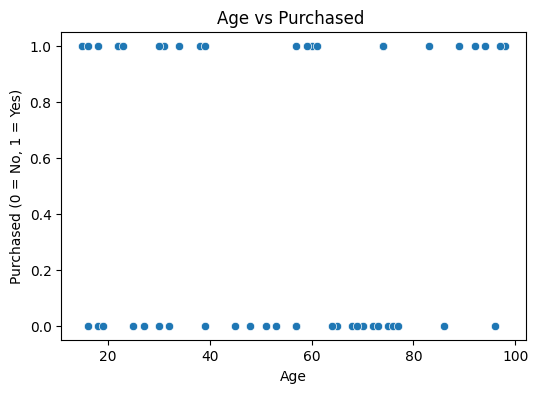

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = customer_df["Age"], y = customer_df["Purchased"])

plt.xlabel("Age")
plt.ylabel("Purchased (0 = No, 1 = Yes)")
plt.title("Age vs Purchased ")
plt.show()


## Step 8: Check the model predict correct on the unseen (new input) data

In [16]:
unseen_data = "12 20 35 40 50".split()
unseen_data = np.array(list(map(int, unseen_data))).reshape(-1, 1)      # Converting to numpy and integer then reshape the numpy 

# Apply StandardScaler
new_age = scaler.transform(unseen_data)

prediction = knn.predict(new_age)
prediction_df = pd.DataFrame(new_age, prediction)

prediction_df

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,0
1,-1.634848
1,-1.335562
1,-0.774402
0,-0.587348
0,-0.213241
